<a href="https://colab.research.google.com/github/amin20033/Hand_cricket/blob/main/Machine_Cricket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello!!!
Enter a name: Aminur
Enter 1 for Heads and 2 for Tails: 2
Enter any number between 1 to 5: 1
Aminur Won
Enter 1 for bat and 2 for bowl: 1
Aminur will bat
Aminur :- Enter a valid run between 1 and 6: 2
Aminur :- Enter a valid run between 1 and 6: 3
Aminur :- Enter a valid run between 1 and 6: 4
Aminur :- Enter a valid run between 1 and 6: 4
Aminur :- Enter a valid run between 1 and 6: 6
Aminur :- Enter a valid run between 1 and 6: 5
Aminur :- Enter a valid run between 1 and 6: 5
Aminur out
Target: 25
Machine :- Enter anything between 1 and 6: 2
Machine made  1  Runs
Machine :- Enter anything between 1 and 6: 4
Machine made  1  Runs
Machine :- Enter anything between 1 and 6: 1
Machine made  4  Runs
Machine :- Enter anything between 1 and 6: 5
Machine made  3  Runs
Machine :- Enter anything between 1 and 6: 5
Machine out
Aminur Won the match by 16 runs


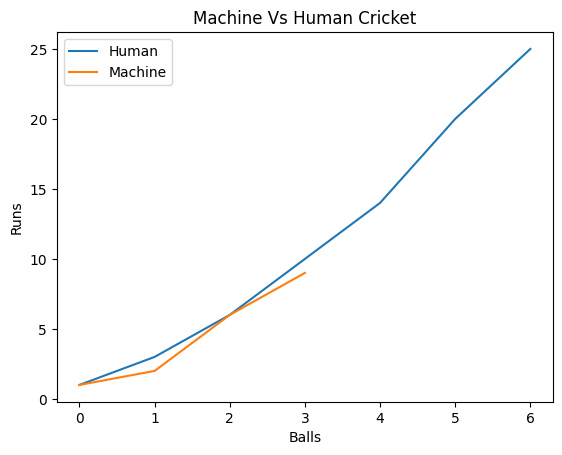

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def main():
    # Greetings
    print("Hello!!!")
    time.sleep(2)

    # Taking Player Name
    player_name = input("Enter a name: ")
    if not player_name.isalpha():
        raise ValueError("The name must not contain any special characters, numbers, or blank spaces")
    time.sleep(2)

    # Toss for heads and tails
    toss = int(input("Enter 1 for Heads and 2 for Tails: "))
    if toss not in [1, 2]:
        raise ValueError("Choose only between 1 and 2")
    time.sleep(1)

    # Human and Machine Toss
    try:
        human_toss = int(input("Enter any number between 1 to 5: "))
        if human_toss not in range(1, 6):
            raise ValueError("Enter the number between 1 and 5 only")
    except ValueError as e:
        print(e)
        return

    machine_toss = np.random.choice([1, 2, 3, 4, 5])
    total = human_toss + machine_toss

    if total % 2 == 0 and toss == 2:
        print(f"{player_name} Won")
        won_toss = True
    else:
        print("Machine Won")
        won_toss = False

    if won_toss:
        choice = int(input("Enter 1 for bat and 2 for bowl: "))
        if choice not in [1, 2]:
            raise ValueError("Choose only between 1 and 2")

        if choice == 1:
            print(f"{player_name} will bat")
            a = human_first_bat(player_name)
            m = a[-1] if len(a) > 0 else 0
            print("Target:", a[-1])
            b = machine_last_bat(m, player_name)
            if b[-1] < a[-1]:
                print(f"{player_name} Won the match by {a[-1] - b[-1]} runs")
            else:
                print("Machine Won the match")
            viz1(a, b)
        else:
            print(f"{player_name} will bowl")
            a = machine_first_bat()
            m = a[-1] if len(a) > 0 else 0
            print("Target:", a[-1])
            b = human_last_bat(m, player_name)
            if b[-1] < a[-1]:
                print(f"Machine Won by {a[-1] - b[-1]} runs")
            else:
                print(f"{player_name} Won")
            viz2(a, b)
    else:
        machine_choice = np.random.choice([1, 2])
        if machine_choice == 1:
            print("Machine will bat")
            a = machine_first_bat()
            m = a[-1] if len(a) > 0 else 0
            print("Target:", a[-1])
            b = human_last_bat(m, player_name)
            if b[-1] < a[-1]:
                print(f"Machine Won by {a[-1] - b[-1]} runs")
            else:
                print(f"{player_name} Won")
            viz2(a, b)
        else:
            print(f"{player_name} will bat")
            a = human_first_bat(player_name)
            m = a[-1] if len(a) > 0 else 0
            print("Target:", a[-1])
            b = machine_last_bat(m, player_name)
            if b[-1] < a[-1]:
                print(f"{player_name} Won the match by {a[-1] - b[-1]} runs")
            else:
                print(f"Machine won")
            viz1(a, b)

def human_first_bat(player_name):
    i = 1
    human_score = [1]
    human_target = 1

    while True:
        try:
            human_run = int(input(f"{player_name} :- Enter a valid run between 1 and 6: "))
            if human_run not in range(1, 7):
                raise ValueError("Choose only between 1 and 6")
            machine_defend = np.random.choice([1, 2, 3, 4, 5, 6])
            if human_run == machine_defend:
                print(f"{player_name} out")
                break
            else:
                human_target += human_run
                human_score.append(human_target)
        except ValueError as e:
            print(e)
    return human_score

def human_last_bat(z, player_name):
    i = 1
    human_score = [0]
    human_target = 0

    while True:
        try:
          if  human_target >= z:
                print(f"{player_name} won")
                break
          else:
            human_run = int(input(f"{player_name} :- Enter a valid run between 1 and 6: "))
            if human_run not in range(1, 7):
                raise ValueError("Choose only between 1 and 6")
            machine_defend = np.random.choice([1, 2, 3, 4, 5, 6])
            if human_run == machine_defend :
                print(f"{player_name} out")
                break
            else:
                human_target += human_run
                human_score.append(human_target)
        except ValueError as e:
            print(e)
    return human_score

def machine_first_bat():
    i = 1
    machine_score = [1]
    machine_target = 1
    run_counter=1
    while True:
        try:
            human_defend = int(input("Machine :- Enter anything between 1 and 6: "))
            machine_run = np.random.choice([1, 2, 3, 4, 5, 6])
            if human_defend == machine_run:
                print("Machine out")
                print("Machine made",0," Runs")
                break
            else:
                machine_target += machine_run
                print("Machine made ",machine_target-run_counter," runs")
                run_counter=machine_target
                machine_score.append(machine_target)
        except ValueError as e:
            print(e)
    return machine_score

def machine_last_bat(z, player_name):
    i = 1
    machine_score = [0]
    machine_target = 0
    run_counter=0
    while True:
        try:
            if  machine_target >= z:
                print("Machine Won")
                break
            else:
              human_defend = int(input("Machine :- Enter anything between 1 and 6: "))
              machine_run = np.random.choice([1, 2, 3, 4, 5, 6])
              if human_defend == machine_run :
                  print("Machine out")
                  break
              else:
                  machine_target += machine_run
                  print("Machine made ",machine_target-run_counter," Runs")
                  run_counter=machine_target
                  machine_score.append(machine_target)
        except ValueError as e:
            print(e)
    return machine_score

def viz1(a, b):
    plt.plot(a, label="Human")
    plt.plot(b, label="Machine")
    plt.legend()
    plt.title("Machine Vs Human Cricket")
    plt.xlabel("Balls")
    plt.ylabel("Runs")
    plt.show()

def viz2(a, b):
    plt.plot(a, label="Machine")
    plt.plot(b, label="Human")
    plt.legend()
    plt.title("Machine Vs Human Cricket")
    plt.xlabel("Balls")
    plt.ylabel("Runs")
    plt.show()

if __name__ == "__main__":
    main()


Hello!!!
Enter a name: Afsha
Enter 1 for Heads and 2 for Tails: 2
Enter any number between 1 to 5: 4
Machine Won
Machine will bat
Machine :- Enter anything between 1 and 6: 4
Machine made  5  runs
Machine :- Enter anything between 1 and 6: 3
Machine made  1  runs
Machine :- Enter anything between 1 and 6: 2
Machine out
Machine made 0  Runs
Target: 7
Afsha :- Enter a valid run between 1 and 6: 6
Afsha :- Enter a valid run between 1 and 6: 6
Afsha won
Afsha Won


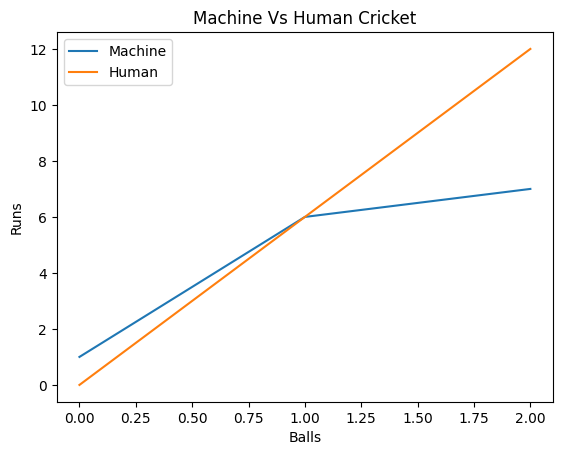

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def main():
    # Greetings
    print("Hello!!!")
    time.sleep(2)

    # Taking Player Name
    player_name = input("Enter a name: ")
    if not player_name.isalpha():
        raise ValueError("The name must not contain any special characters, numbers, or blank spaces")
    time.sleep(2)

    # Toss for heads and tails
    toss = int(input("Enter 1 for Heads and 2 for Tails: "))
    if toss not in [1, 2]:
        raise ValueError("Choose only between 1 and 2")
    time.sleep(1)

    # Human and Machine Toss
    try:
        human_toss = int(input("Enter any number between 1 to 5: "))
        if human_toss not in range(1, 6):
            raise ValueError("Enter the number between 1 and 5 only")
    except ValueError as e:
        print(e)
        return

    machine_toss = np.random.choice([1, 2, 3, 4, 5])
    total = human_toss + machine_toss

    if total % 2 == 0 and toss == 2:
        print(f"{player_name} Won")
        won_toss = True
    elif total % 2 == 1 and toss == 1:
        print(f"{player_name} Won")
        won_toss = True
    else:
        print("Machine Won")
        won_toss = False

    if won_toss:
        choice = int(input("Enter 1 for bat and 2 for bowl: "))
        if choice not in [1, 2]:
            raise ValueError("Choose only between 1 and 2")

        if choice == 1:
            print(f"{player_name} will bat")
            a = human_first_bat(player_name)
            m = a[-1] if len(a) > 0 else 0
            print("Target:", a[-1])
            b = machine_last_bat(m, player_name)
            if b[-1] < a[-1]:
                print(f"{player_name} Won the match by {a[-1] - b[-1]} runs")
            else:
                print("Machine Won the match")
            viz1(a, b)
        else:
            print(f"{player_name} will bowl")
            a = machine_first_bat()
            m = a[-1] if len(a) > 0 else 0
            print("Target:", a[-1])
            b = human_last_bat(m, player_name)
            if b[-1] < a[-1]:
                print(f"Machine Won by {a[-1] - b[-1]} runs")
            else:
                print(f"{player_name} Won")
            viz2(a, b)
    else:
        machine_choice = np.random.choice([1, 2])
        if machine_choice == 1:
            print("Machine will bat")
            a = machine_first_bat()
            m = a[-1] if len(a) > 0 else 0
            print("Target:", a[-1])
            b = human_last_bat(m, player_name)
            if b[-1] < a[-1]:
                print(f"Machine Won by {a[-1] - b[-1]} runs")
            else:
                print(f"{player_name} Won")
            viz2(a, b)
        else:
            print(f"{player_name} will bat")
            a = human_first_bat(player_name)
            m = a[-1] if len(a) > 0 else 0
            print("Target:", a[-1])
            b = machine_last_bat(m, player_name)
            if b[-1] < a[-1]:
                print(f"{player_name} Won the match by {a[-1] - b[-1]} runs")
            else:
                print(f"Machine won")
            viz1(a, b)

def human_first_bat(player_name):
    i = 1
    human_score = [1]
    human_target = 1

    while True:
        try:
            human_run = int(input(f"{player_name} :- Enter a valid run between 1 and 6: "))
            if human_run not in range(1, 7):
                raise ValueError("Choose only between 1 and 6")
            machine_defend = np.random.choice([1, 2, 3, 4, 5, 6])
            if human_run == machine_defend:
                print(f"{player_name} out")
                break
            else:
                human_target += human_run
                human_score.append(human_target)
        except ValueError as e:
            print(e)
    return human_score

def human_last_bat(z, player_name):
    i = 1
    human_score = [0]
    human_target = 0

    while True:
        try:
          if  human_target >= z:
                print(f"{player_name} won")
                break
          else:
            human_run = int(input(f"{player_name} :- Enter a valid run between 1 and 6: "))
            if human_run not in range(1, 7):
                raise ValueError("Choose only between 1 and 6")
            machine_defend = np.random.choice([1, 2, 3, 4, 5, 6])
            if human_run == machine_defend :
                print(f"{player_name} out")
                break
            else:
                human_target += human_run
                human_score.append(human_target)
        except ValueError as e:
            print(e)
    return human_score

def machine_first_bat():
    i = 1
    machine_score = [1]
    machine_target = 1
    run_counter=1
    while True:
        try:
            human_defend = int(input("Machine :- Enter anything between 1 and 6: "))
            machine_run = np.random.choice([1, 2, 3, 4, 5, 6])
            if human_defend == machine_run:
                print("Machine out")
                print("Machine made",0," Runs")
                break
            else:
                machine_target += machine_run
                print("Machine made ",machine_target-run_counter," runs")
                run_counter=machine_target
                machine_score.append(machine_target)
        except ValueError as e:
            print(e)
    return machine_score

def machine_last_bat(z, player_name):
    i = 1
    machine_score = [0]
    machine_target = 0
    run_counter=0
    while True:
        try:
            if  machine_target >= z:
                print("Machine Won")
                break
            else:
              human_defend = int(input("Machine :- Enter anything between 1 and 6: "))
              machine_run = np.random.choice([1, 2, 3, 4, 5, 6])
              if human_defend == machine_run :
                  print("Machine out")
                  break
              else:
                  machine_target += machine_run
                  print("Machine made ",machine_target-run_counter," Runs")
                  run_counter=machine_target
                  machine_score.append(machine_target)
        except ValueError as e:
            print(e)
    return machine_score

def viz1(a, b):
    plt.plot(a, label="Human")
    plt.plot(b, label="Machine")
    plt.legend()
    plt.title("Machine Vs Human Cricket")
    plt.xlabel("Balls")
    plt.ylabel("Runs")
    plt.show()

def viz2(a, b):
    plt.plot(a, label="Machine")
    plt.plot(b, label="Human")
    plt.legend()
    plt.title("Machine Vs Human Cricket")
    plt.xlabel("Balls")
    plt.ylabel("Runs")
    plt.show()

if __name__ == "__main__":
    main()
